## Read video tape with OpenCV2

In [57]:
import cv2
from os.path import join
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
VIDEO_FOLDER = '../data/CDF M17 VBALL - Voiron/'
VIDEO_NAME = 'Vb@ll - Voiron 1er Set 25-21.mkv'

src = join(VIDEO_FOLDER, VIDEO_NAME)
cap = cv2.VideoCapture(src)

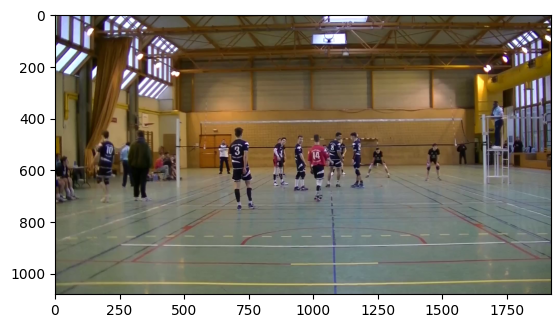

True


In [3]:
ret, frame = cap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()
print(ret)

In [30]:
def read_video(src, limit_output_size=10, offset_between=0, offset_before=0):
    """Read the video stored at path 'src' using cv2, return the list of the frames of the video.
    
    Each read frame is transformed to rgb format.
    <param limit_output_size> int : maximum number of frames to be returned
    <param offset_between> int : number of unselected frames between two selected frames
    """
    video_cap = cv2.VideoCapture(src)
    frames = []
    iter = 0
    offset = offset_before
    progress = tqdm(total=limit_output_size*(offset_between+1)+offset_before)
    while video_cap.isOpened() and iter < limit_output_size:
        try:
            ret, frame = video_cap.read()
            if offset == 0:
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(rgb)
                iter += 1
                offset = offset_between
            else:
                offset -= 1
            progress.update(1)
        except ValueError as err:
            print('Frame loading failed : ', err)
            break
    print('Full output computed')
    return frames

In [5]:
frames = read_video(src, limit_output_size=100, offset_between=100)   

100%|█████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:08<00:00, 129.30it/s]

Full output computed


In [17]:
def print_bgr(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, interpolation='nearest')
    plt.show()
    
def print_rgb(img):
    plt.imshow(img, interpolation='nearest')
    plt.show()
    

In [25]:
# Approche Hough Circles

squared_dist = lambda x1, y1, x2, y2 : (x1 - x2) ** 2 + (y1 - y2) ** 2

def hough_circles(frames, dist=squared_dist, ksize_blur=17, sigma_blur=0):
    """Apply Hough circles approach to ball detection highlighting it with a circle on the original frame.
    
    https://www.youtube.com/watch?v=RaCwLrKuS1w&ab_channel=CodeSavant
    """
    
    for frame in frames:
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        blurred_frame = cv2.GaussianBlur(gray_frame, (ksize_blur, ksize_blur), sigma_blur)
        
        circles = cv2.HoughCircles(blurred_frame, cv2.HOUGH_GRADIENT, 1.2, 100,
                                   param1=100, param2=30, minRadius=75, maxRadius=400)
        
        if circles is None:
            circles = np.uint16(np.around(circles))
            chosen = None
            for circle in circles[0, :]:
                if chosen is None:
                    chosen = circle
                if prevCircle is not None:
                    if dist(chosen[0], chosen[1], prevCircle[0], prevCircle[1]) <= dist(circle[0], circle[1], prevCircle[0], prevCircle[1]):
                        chosen = circle
            cv2.circle(frame, (chosen[0],chosen[1]), 1, (0,100,100), 3)
            cv2.circle(frame, (chosen[0],chosen[1]), chosen[2], (255,0,255), 3)
            prevCircle = chosen
        
        plt.imshow(frame, interpolation='nearest')
        plt.show()
                            
    

In [ ]:
hough_circles(frames)

In [63]:
hough_frames = read_video(src, limit_output_size=500, offset_between=0, offset_before=240)

100%|███████████████████████████████████████████████████████████████████████████████| 740/740 [00:07<00:00, 100.60it/s]

Full output computed


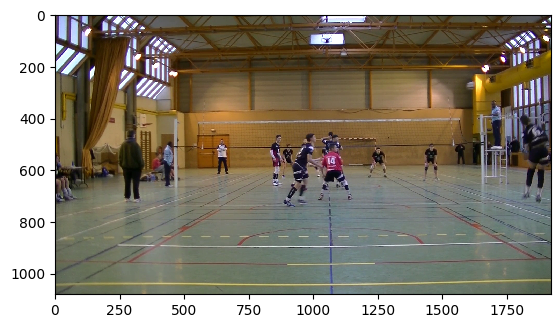

In [64]:
print_rgb(hough_frames[0])

Nombre de cercles détectés :  13


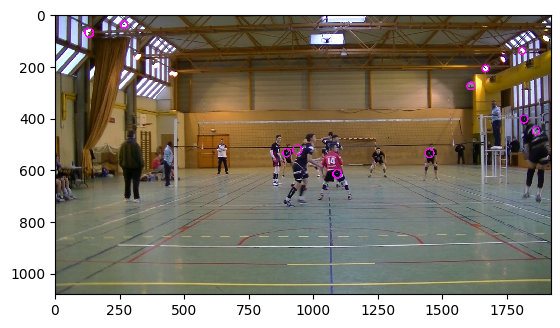

In [124]:
wrk_frame = hough_frames[0].copy()
gray_frame = cv2.cvtColor(wrk_frame, cv2.COLOR_RGB2GRAY)
blurred_frame = cv2.GaussianBlur(gray_frame, (17, 17), 0)

circles = cv2.HoughCircles(blurred_frame, cv2.HOUGH_GRADIENT, 1.28, 1,
                           param1=100, param2=20, minRadius=13, maxRadius=20)
print('Nombre de cercles détectés : ', len(circles[0]))

if circles is not None:
    circles = np.uint64(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(wrk_frame, (circle[0],circle[1]), 1, (0,100,100), 3)
        cv2.circle(wrk_frame, (circle[0],circle[1]), circle[2], (255,0,255), 3)

print_rgb(wrk_frame)
